# 8. (Lineare) Regression
## Anforderungen an Projektumsetzung: Regression
---
**AUFGABE:**

- Entscheiden Sie, ob Sie mit der linearen Regression modellieren, prädizieren, oder beides erreichen wollen.
- Führen Sie die entsprechende(n) Analyse(n) methodisch sauber durch und berichten Sie entsprechend der    eingeführten Kriterien und Evaluationsmaße das Ergebnis.
- Wenn Sie sowohl modellieren als auch prädizieren wollen, führen Sie die Modellierung nur auf den Trainingsdaten durch, um zu vermeiden, dass Sie ungewollt aus Ihren Testdaten lernen. Trainieren Sie das Prädiktionsmodell im zweiten Schritt aufgrund der Erkenntnisse der Modellierung.
----
Ein prädiktives Modell wurde nicht angewendet, da die Prädiktion wie eine Klassifikation nur ohne Zielvariablen ist und eine Klassifikation auf diesem Datensatz keine aussagekräftigen Ergebnisse lieferte.
Daher wird die lineare Regression nur modelliert. 

In [1]:
import statsmodels.api as sm
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
apps = pd.read_csv("Daten/Google-Playstore_Edit2.csv")

In [3]:
apps.dtypes

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                 float64
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
Released Year        float64
dtype: object

#### Datenaufbereitung

In [4]:
apps['Free']             = apps['Free'].astype(float)
apps['Ad Supported']     = apps['Ad Supported'].astype(float)
apps['Editors Choice']   = apps['Editors Choice'].astype(float)
apps['In App Purchases'] = apps['In App Purchases'].astype(float)
apps['Maximum Installs'] = apps['Maximum Installs'].astype(float)

In [5]:
apps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Released Year
0,BBD Store - Best Budget Deals,com.app.BBD_Store,Shopping,5.0,20.0,100+,100.0,179.0,1.0,0.0,...,bbdstore9137@gmail.com,2020-12-31,2021-05-27,Everyone,https://bbd-store-0.flycricket.io/privacy.html,1.0,0.0,0.0,2021-06-16 00:05:22,2020.0
1,아가펫츠,com.suholdings.agapets,Lifestyle,5.0,8.0,100+,100.0,152.0,1.0,0.0,...,info@agapets.com,2020-06-16,2020-08-06,Teen,http://www.agapets.com/terms/terms_privacy.html,1.0,0.0,0.0,2021-06-16 02:17:56,2020.0
2,Zákamenné,com.impoinfo.zakamenne,Communication,5.0,8.0,"1,000+",1000.0,1338.0,1.0,0.0,...,adsupra.com@gmail.com,2020-06-25,2020-01-20,Everyone,http://www.impoinfo.com/policy_sk.html,0.0,0.0,0.0,2021-06-16 05:12:07,2020.0
3,Parihans social app,com.wParihansVideocallingandmessenger_11521310,Social,5.0,22.0,100+,100.0,145.0,1.0,0.0,...,parihans2931@gmail.com,2020-07-10,2020-12-02,Teen,https://sites.google.com/view/parihans-vlog/pr...,0.0,0.0,0.0,2021-06-16 05:39:39,2020.0
4,CHATRIS 2019 - Match 3 Puzzle Game,com.Doosin.CHATRIS1,Puzzle,5.0,13.0,50+,50.0,69.0,1.0,0.0,...,doosin97@gmail.com,2019-09-11,2019-09-12,Everyone,https://blog.naver.com/hd9172/221612868565,1.0,1.0,0.0,2021-06-16 02:36:45,2019.0


In [6]:
# Um den OLS anwenden zu können, müssen die notwenidigen Features numerisch umcodiert werden
# Und alle Features löschen, die nur Unique-Werte besitzen, zu viel Rechenkapazität benötigen und für eine lineare Regression irrelvant sind

apps.drop(columns=['App Name', 'App Id', 'Installs', 'Minimum Installs', 'Developer Id', 'Developer Website', 'Minimum Android', 'Developer Email', 'Privacy Policy', 'Released', 'Scraped Time', 'Last Updated', 'Currency', 'Category', 'Editors Choice'], inplace=True)
#apps = apps.dropna()

numerical_cols = list(apps.select_dtypes(include="float").columns)
categorical_cols = list(apps.select_dtypes(include="object").columns)

object_encode = pd.get_dummies(apps[categorical_cols])

In [7]:
numeric = pd.concat([apps[numerical_cols], object_encode], axis = 1)
numeric = numeric.dropna()
numeric.head()

,Rating,Rating Count,Maximum Installs,Free,Price,Size,Ad Supported,In App Purchases,Released Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.0,20.0,179.0,1.0,0.0,6.7,1.0,0.0,2020.0,0,1,0,0,0,0
1,5.0,8.0,152.0,1.0,0.0,71.0,1.0,0.0,2020.0,0,0,0,0,1,0
2,5.0,8.0,1338.0,1.0,0.0,2.4,0.0,0.0,2020.0,0,1,0,0,0,0
3,5.0,22.0,145.0,1.0,0.0,50.0,0.0,0.0,2020.0,0,0,0,0,1,0
4,5.0,13.0,69.0,1.0,0.0,18.0,1.0,1.0,2019.0,0,1,0,0,0,0


In [8]:
numeric.rename(columns={'Maximum Installs':'Maximum_Installs', 'Rating Count':'Rating_Count', 'Ad Supported':'Ad_Supported', 'In App Purchases':'In_App_Purchases', 'Released Year':'Released_Year', 'Content Rating_Adults only 18+':'Content_Rating_Adults_only_over18', 'Content Rating_Everyone':'Content_Rating_Everyone', 'Content Rating_Everyone 10+':'Content_Rating_Everyone_over10', 'Content Rating_Mature 17+':'Content_Rating_Mature_over17', 'Content Rating_Teen':'Content_Rating_Teen', 'Content Rating_Unrated':'Content_Rating_Unrated'}, inplace=True)

In [9]:
print(numeric.describe())

             Rating  Rating_Count  Maximum_Installs          Free  \
count  2.241671e+06  2.241671e+06      2.241671e+06  2.241671e+06   
mean   2.204496e+00  2.751521e+03      3.091149e+05  9.802772e-01   
std    2.108366e+00  1.984663e+05      2.208515e+07  1.390461e-01   
min    0.000000e+00  0.000000e+00      0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00      8.500000e+01  1.000000e+00   
50%    3.000000e+00  6.000000e+00      7.040000e+02  1.000000e+00   
75%    4.300000e+00  4.200000e+01      7.400000e+03  1.000000e+00   
max    5.000000e+00  1.385576e+08      1.205763e+10  1.000000e+00   

              Price          Size  Ad_Supported  In_App_Purchases  \
count  2.241671e+06  2.241671e+06  2.241671e+06      2.241671e+06   
mean   1.048762e-01  1.872470e+01  5.064160e-01      8.543671e-02   
std    2.658829e+00  2.371425e+01  4.999589e-01      2.795305e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000e+00   
25%    0.000000e+00  4.700000e+00

----------
## 1. Hypothese: Gut bewertete Anwendungen haben mehr Installationen.
------

In [10]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
first_hypo_basic = ols("Maximum_Installs ~ Rating", numeric).fit()

print(first_hypo_basic.summary())

                            OLS Regression Results                            
Dep. Variable:       Maximum_Installs   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     383.0
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           2.80e-85
Time:                        11:34:16   Log-Likelihood:            -4.1088e+07
No. Observations:             2241671   AIC:                         8.218e+07
Df Residuals:                 2241669   BIC:                         8.218e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7296.5136   2.13e+04      0.342      0.7

In [11]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
first_hypo_full = ols("Maximum_Installs ~ Rating + Rating_Count + Free + Price + Size + Ad_Supported + In_App_Purchases + Released_Year + Content_Rating_Adults_only_over18 + Content_Rating_Everyone + Content_Rating_Everyone_over10 + Content_Rating_Mature_over17 + Content_Rating_Teen", numeric).fit()

print(first_hypo_full.summary())

                            OLS Regression Results                            
Dep. Variable:       Maximum_Installs   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                 7.127e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:34:19   Log-Likelihood:            -4.0701e+07
No. Observations:             2241671   AIC:                         8.140e+07
Df Residuals:                 2241657   BIC:                         8.140e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

----
- first_hypo_full sagt deutlich mehr Varianz aus als das first_hypo_basic Modell
- Varianz dennoch klein, da der R-Squared unter 0.36 liegt und somit als `schwach` gilt
- für das Modell werden nach P>|t| die Features Rating, Rating_Count, Free, In-App-Purchases, Editors_Choice und Released_Year relevant sein
----

In [12]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
first_hypo_opt = ols("Maximum_Installs ~ Rating + Rating_Count + Free + In_App_Purchases + Released_Year", numeric).fit()

print(first_hypo_opt.summary())

                            OLS Regression Results                            
Dep. Variable:       Maximum_Installs   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                 1.853e+05
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:34:20   Log-Likelihood:            -4.0701e+07
No. Observations:             2241671   AIC:                         8.140e+07
Df Residuals:                 2241665   BIC:                         8.140e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.948e+08   1.22e+07  

----
- Varianz hat sich weder verschlechtert noch verbessert
----

In [13]:
anova_results = anova_lm(first_hypo_basic,first_hypo_opt,first_hypo_full )

print('\nANOVA results')
print(anova_results)

# Die Modelle werden nach der Größe nach angegeben, also mit den meisten Termen zuerst: 0 - full, 1 - opt, 2 - basic
# Erste Ausgabezeile wird egal sein, weil für first_hypo_full kein Vorgänger vorhanden ist


ANOVA results
    df_resid           ssr  df_diff       ss_diff              F   Pr(>F)
0  2241669.0  1.093197e+21      0.0           NaN            NaN      NaN
1  2241665.0  7.736369e+20      4.0  3.195600e+20  231488.176010  0.00000
2  2241657.0  7.736291e+20      8.0  7.769463e+15       2.814086  0.00405


----
- Sowohl der Vergleich von _opt mit _basic als auch der Vergleich von _full mit _opt ist signifikant
- _full ist also tatsächlich besser als _opt (und damit auch als _basic)
----

### 2. Hypothese: Günstigere/kostenlose Anwendungen haben mehr Installationen.

In [14]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
snd_hypo_price = ols("Maximum_Installs ~ Price", numeric).fit()

print(snd_hypo_price.summary())

                            OLS Regression Results                            
Dep. Variable:       Maximum_Installs   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6340
Date:                Mon, 20 Dec 2021   Prob (F-statistic):              0.426
Time:                        11:34:21   Log-Likelihood:            -4.1088e+07
No. Observations:             2241671   AIC:                         8.218e+07
Df Residuals:                 2241669   BIC:                         8.218e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.096e+05   1.48e+04     20.971      0.0

----
- negativer Koeffizient, da Price, reale Werte besitzt
- Erkenntnis: jeder weiterer Dollar für eine Anwendung, kosten rund 4417 Installationen pro Anwendung weniger
----

In [15]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
snd_hypo_basic = ols("Maximum_Installs ~ Free", numeric).fit()

print(snd_hypo_basic.summary())

                            OLS Regression Results                            
Dep. Variable:       Maximum_Installs   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.926
Date:                Mon, 20 Dec 2021   Prob (F-statistic):            0.00487
Time:                        11:34:21   Log-Likelihood:            -4.1088e+07
No. Observations:             2241671   AIC:                         8.218e+07
Df Residuals:                 2241669   BIC:                         8.218e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.634e+04   1.05e+05      0.156      0.8

---
- sinkender Modellterm mit wachsendem Zielwert
- diese Hypothese sollte theoretisch gesehen einen negativen Koffizienten haben, da wir einen sinkenden Modellterm und einen wachsenden Zielwert besitzen
- positiver Koeefizient, weil Free nur aus 0 und 1 bestehen
---

In [16]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
snd_hypo_full = ols("Maximum_Installs ~ Free + Rating + Rating_Count + Price + Size + Ad_Supported + In_App_Purchases + Released_Year + Content_Rating_Adults_only_over18 + Content_Rating_Everyone + Content_Rating_Everyone_over10 + Content_Rating_Mature_over17 + Content_Rating_Teen", numeric).fit()

print(snd_hypo_full.summary())

                            OLS Regression Results                            
Dep. Variable:       Maximum_Installs   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                 7.127e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:34:25   Log-Likelihood:            -4.0701e+07
No. Observations:             2241671   AIC:                         8.140e+07
Df Residuals:                 2241657   BIC:                         8.140e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

---
- snd_hypo_full sagt deutlich mehr Varianz aus als das snd_hypo_basic Modell
- Varianz dennoch klein, da der R-Squared unter 0.36 liegt und somit als `schwach` gilt
- für das Modell werden nach P>|t| die Features Rating, Rating_Count, Free, In-App-Purchases, Editors_Choice und Released_Year relevant sein
---

In [17]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
snd_hypo_opt = ols("Maximum_Installs ~ Free + Rating + Rating_Count + In_App_Purchases + Released_Year", numeric).fit()

print(snd_hypo_opt.summary())

                            OLS Regression Results                            
Dep. Variable:       Maximum_Installs   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                 1.853e+05
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:34:26   Log-Likelihood:            -4.0701e+07
No. Observations:             2241671   AIC:                         8.140e+07
Df Residuals:                 2241665   BIC:                         8.140e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.948e+08   1.22e+07  

----
- Varianz hat sich weder verschlechtert noch verbessert
----

In [111]:
anova_results = anova_lm(snd_hypo_price,snd_hypo_opt,snd_hypo_full)

print('\nANOVA results')
print(anova_results)

# Die Modelle werden nach der Größe nach angegeben, also mit den meisten Termen zuerst: 0 - full, 1 - opt, 2 - basic
# Erste Ausgabezeile wird egal sein, weil für snd_hypo_full kein Vorgänger vorhanden ist


ANOVA results
    df_resid           ssr  df_diff       ss_diff              F   Pr(>F)
0  2241669.0  1.093383e+21      0.0           NaN            NaN      NaN
1  2241665.0  7.736369e+20      4.0  3.197465e+20  231623.256755  0.00000
2  2241657.0  7.736291e+20      8.0  7.769463e+15       2.814086  0.00405


----
- Sowohl der Vergleich von _opt mit _basic als auch der Vergleich von _full mit _opt ist signifikant
- _full ist also tatsächlich besser als _opt (und damit auch als _basic)
----

### 3. Hypothese: Anwendungen für Erwachsene (Content_Rating_Adults_only_over18) sind eher kostenpflichtig.
----

In [19]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
trd_hypo_basic = ols("Free ~ Content_Rating_Adults_only_over18", numeric).fit()

print(trd_hypo_basic.summary())

                            OLS Regression Results                            
Dep. Variable:                   Free   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.616
Date:                Mon, 20 Dec 2021   Prob (F-statistic):              0.106
Time:                        11:34:26   Log-Likelihood:             1.2419e+06
No. Observations:             2241671   AIC:                        -2.484e+06
Df Residuals:                 2241669   BIC:                        -2.484e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [20]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
trd_hypo_full = ols("Free ~ Content_Rating_Adults_only_over18 + Maximum_Installs + Rating + Rating_Count + Price + Size + Ad_Supported + In_App_Purchases + Released_Year + Content_Rating_Everyone + Content_Rating_Everyone_over10 + Content_Rating_Mature_over17 + Content_Rating_Teen", numeric).fit()

print(trd_hypo_full.summary())

                            OLS Regression Results                            
Dep. Variable:                   Free   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                 2.064e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:34:30   Log-Likelihood:             1.3686e+06
No. Observations:             2241671   AIC:                        -2.737e+06
Df Residuals:                 2241657   BIC:                        -2.737e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

---
- trd_hypo_full sagt deutlich mehr Varianz aus als das trd_hypo_basic Modell
- Varianz dennoch klein, da der R-Squared unter 0.36 liegt und somit als `schwach` gilt
- für das Modell werden nach P>|t| die Features Maximum Installs, Price, Size, Ad-Supported, In_App_Purchases, Released_Year und Content_Rating_Everyone_over10 relevant sein
---

In [21]:
# Syntax für die Regressionsgleichung: Zielwert ~ Feature 1 + Feature 2 + ...
trd_hypo_opt = ols("Free ~ Content_Rating_Adults_only_over18 + Maximum_Installs + Price + Size + Ad_Supported + In_App_Purchases + Released_Year + Content_Rating_Everyone_over10", numeric).fit()

print(trd_hypo_opt.summary())

                            OLS Regression Results                            
Dep. Variable:                   Free   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                 3.353e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:34:32   Log-Likelihood:             1.3686e+06
No. Observations:             2241671   AIC:                        -2.737e+06
Df Residuals:                 2241662   BIC:                        -2.737e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

----
- Varianz hat sich weder verschlechtert noch verbessert
- aber der P>|t| hat sich verbessert im Gegensatz zum _full
----

In [22]:
anova_results = anova_lm(trd_hypo_basic,trd_hypo_opt,trd_hypo_full)

print('\nANOVA results')
print(anova_results)

# Die Modelle werden nach der Größe nach angegeben, also mit den meisten Termen zuerst: 0 - full, 1 - opt, 2 - basic
# Erste Ausgabezeile wird egal sein, weil für snd_hypo_full kein Vorgänger vorhanden ist


ANOVA results
    df_resid           ssr  df_diff      ss_diff             F    Pr(>F)
0  2241669.0  43339.965563      0.0          NaN           NaN       NaN
1  2241662.0  38708.466450      7.0  4631.499113  38317.169512  0.000000
2  2241657.0  38707.871094      5.0     0.595356      6.895672  0.000002


----
- Sowohl der Vergleich von _opt mit _basic als auch der Vergleich von _full mit _opt ist signifikant
- aber _opt ist also tatsächlich besser als _full (und damit auch als _basic) 
----

----
### Prädiktion

Y ~ B*X + e --> Y soll durch ein oder mehrere X bestimmt bzw. vorhergesagt werden

***Voraussetzungen:*** 
- Regressant (Y) und Prädiktoren (X) sollten möglich linear sein
- Y sollte metrisch sein, also keine Kategoriale Variablen oder booleansche Variablen

Wir bestimmen/vorhersagen also die Installationen mit Hilfe von Ratings, Rating Counts und Price.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [83]:
X = numeric[['Rating', 'Rating_Count','Price']]
Y = pd.DataFrame(numeric['Maximum_Installs'])

In [84]:
model= LinearRegression()
model.fit(X, Y)

LinearRegression()

In [85]:
intercept = model.intercept_[0]
slope = model.coef_[0, 0]
r_sq = model.score(X, Y)

print("-----Lineare Regression-----")
print("Intercept:", intercept)
print("Slope:", slope)
print("Coefficient of determination:", r_sq)

-----Lineare Regression-----
Intercept: 11989.464572794212
Slope: 59810.333794247636
Coefficient of determination: 0.2923523175066215


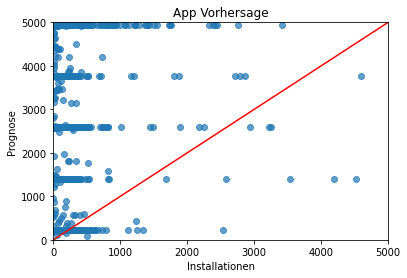

In [86]:
Y_pred = model.predict(X)

# Plot
plt.scatter(numeric['Maximum_Installs'], Y_pred, alpha=0.7)
plt.title("App Vorhersage")
plt.xlabel("Installationen")
plt.ylabel("Prognose")
plt.xlim(0, 5000)
plt.ylim(0, 5000)
ax = plt.gca()
line = mlines.Line2D([0, 1], [0, 1], color="red")
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [105]:
cols_ratio = ['Rating', 'Rating_Count','Price']
cols_target = ['Maximum_Installs']

dataSet_ratio = numeric.loc[:, cols_ratio]
dataSet_target = numeric[cols_target]

In [106]:
X2 = dataSet_ratio[['Price']]
Y2 = numeric[cols_target]

In [107]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X2, Y2,
                                                    test_size = 0.3,    
                                                    random_state = None)

In [108]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [109]:
print('------ Lineare Regression -----')
print('Funktion via sklearn: y = %.3f * x + %.3f' % (lr.coef_[0], lr.intercept_))
print("Intercept: {}".format(lr.intercept_))
print("Slope: {}".format(lr.coef_[0]))
print("Training Set R² Score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set R² Score: {:.2f}".format(lr.score(X_test, y_test)))
print("\n")

------ Lineare Regression -----
Funktion via sklearn: y = -4344.438 * x + 311607.143
Intercept: [311607.14305347]
Slope: [-4344.43807227]
Training Set R² Score: 0.00
Test Set R² Score: 0.00




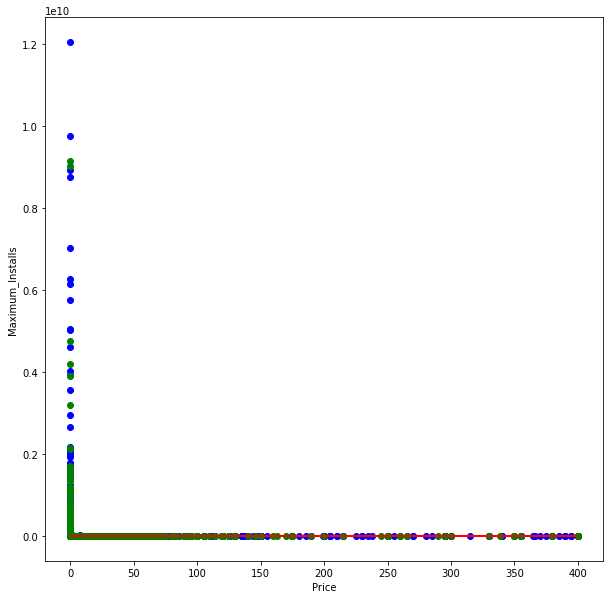

In [110]:
plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train, color = 'blue')                 # Blaue Punkte sind Trainingsdaten
plt.scatter(X_test, y_test, color = 'green')                  # Grüne Punkte sind Testdaten
plt.plot(X_train, lr.predict(X_train), color = 'red')         # Hier ensteht die Gerade (x, y) = (x, lr.predict(x)
plt.xlabel(X_train.columns[0])
plt.ylabel(cols_target[0])
plt.show()